

> 
DES



In [1]:
PI = [58, 50, 42, 34, 26, 18, 10, 2,
      60, 52, 44, 36, 28, 20, 12, 4,
      62, 54, 46, 38, 30, 22, 14, 6,
      64, 56, 48, 40, 32, 24, 16, 8,
      57, 49, 41, 33, 25, 17, 9, 1,
      59, 51, 43, 35, 27, 19, 11, 3,
      61, 53, 45, 37, 29, 21, 13, 5,
      63, 55, 47, 39, 31, 23, 15, 7]

# Initial permut made on the key
CP_1 = [57, 49, 41, 33, 25, 17, 9,
        1, 58, 50, 42, 34, 26, 18,
        10, 2, 59, 51, 43, 35, 27,
        19, 11, 3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15,
        7, 62, 54, 46, 38, 30, 22,
        14, 6, 61, 53, 45, 37, 29,
        21, 13, 5, 28, 20, 12, 4]

# Permut applied on shifted key to get Ki+1
CP_2 = [14, 17, 11, 24, 1, 5, 3, 28,
        15, 6, 21, 10, 23, 19, 12, 4,
        26, 8, 16, 7, 27, 20, 13, 2,
        41, 52, 31, 37, 47, 55, 30, 40,
        51, 45, 33, 48, 44, 49, 39, 56,
        34, 53, 46, 42, 50, 36, 29, 32]

# Expand matrix to get a 48bits matrix of datas to apply the xor with Ki
E = [32, 1, 2, 3, 4, 5,
     4, 5, 6, 7, 8, 9,
     8, 9, 10, 11, 12, 13,
     12, 13, 14, 15, 16, 17,
     16, 17, 18, 19, 20, 21,
     20, 21, 22, 23, 24, 25,
     24, 25, 26, 27, 28, 29,
     28, 29, 30, 31, 32, 1]

# SBOX
S_BOX = [

    [[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
     [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
        [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
        [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],
     ],

    [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
     [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
        [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
        [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9],
     ],

    [[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
     [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
        [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
        [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12],
     ],

    [[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
     [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
        [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
        [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14],
     ],

    [[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
     [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
        [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
        [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3],
     ],

    [[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
     [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
        [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
        [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13],
     ],

    [[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
     [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
        [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
        [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12],
     ],

    [[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
     [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
        [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
        [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11],
     ]
]

# Permut made after each SBox substitution for each round
P = [16, 7, 20, 21, 29, 12, 28, 17,
     1, 15, 23, 26, 5, 18, 31, 10,
     2, 8, 24, 14, 32, 27, 3, 9,
     19, 13, 30, 6, 22, 11, 4, 25]

# Final permut for datas after the 16 rounds
PI_1 = [40, 8, 48, 16, 56, 24, 64, 32,
        39, 7, 47, 15, 55, 23, 63, 31,
        38, 6, 46, 14, 54, 22, 62, 30,
        37, 5, 45, 13, 53, 21, 61, 29,
        36, 4, 44, 12, 52, 20, 60, 28,
        35, 3, 43, 11, 51, 19, 59, 27,
        34, 2, 42, 10, 50, 18, 58, 26,
        33, 1, 41, 9, 49, 17, 57, 25]

# Matrix that determine the shift for each round of keys
SHIFT = [1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1]


def string_to_bit_array(text):  # Convert a string into a list of bits
    array = list()
    for char in text:
        binval = binvalue(char, 8)  # Get the char value on one byte
        # Add the bits to the final list
        array.extend([int(x) for x in list(binval)])
    return array


def bit_array_to_string(array):  # Recreate the string from the bit array
    res = ''.join([chr(int(y, 2)) for y in [''.join([str(x)
                                                     for x in bytes]) for bytes in nsplit(array, 8)]])
    return res


def binvalue(val, bitsize):  # Return the binary value as a string of the given size
    binval = bin(val)[2:] if isinstance(val, int) else bin(ord(val))[2:]
    if len(binval) > bitsize:
        raise "binary value larger than the expected size"
    while len(binval) < bitsize:
        binval = "0"+binval  # Add as many 0 as needed to get the wanted size
    return binval


def nsplit(s, n):  # Split a list into sublists of size "n"
    return [s[k:k+n] for k in range(0, len(s), n)]


ENCRYPT = 1
DECRYPT = 0


class DES():
    def __init__(self):
        self.password = None
        self.text = None
        self.keys = list()

    def run(self, key, text, action=ENCRYPT, padding=False, debug=False):
        self.password =  [int(char) for char in list(key)]
        self.text = text

        if padding and action == ENCRYPT:
            self.addPadding()
        elif len(self.text) % 8 != 0:  # If not padding specified data size must be multiple of 8 bytes
            raise "Data size should be multiple of 8"

        self.generatekeys()  # Generate all the keys
        result = list()

        # Convert the block in bit array
        block = [int(char) for char in list(text)]
        block = self.permut(block, PI)  # Apply the initial permutation
        g, d = nsplit(block, 32)  # g(LEFT), d(RIGHT)
        tmp = None
        for i in range(16):  # Do the 16 rounds
            d_e = self.expand(d, E)  # Expand d to match Ki size (48bits)
            if action == ENCRYPT:
                tmp = self.xor(self.keys[i], d_e)  # If encrypt use Ki
            else:
                # If decrypt start by the last key
                tmp = self.xor(self.keys[15-i], d_e)
            tmp = self.substitute(tmp)  # Method that will apply the SBOXes
            tmp = self.permut(tmp, P)
            tmp = self.xor(g, tmp)
            g = d
            d = tmp

        # Do the last permut and append the result to result
        result = self.permut(d+g, PI_1)

        if padding and action == DECRYPT:
            # Remove the padding if decrypt and padding is true
            return self.removePadding(result)
        else:
            return result
        
    def substitute(self, d_e):  # Substitute bytes using SBOX
        subblocks = nsplit(d_e, 6)  # Split bit array into sublist of 6 bits
        result = list()
        for i in range(len(subblocks)):  # For all the sublists
            block = subblocks[i]
            # Get the row with the first and last bit
            row = int(str(block[0])+str(block[5]), 2)
            # Column is the 2,3,4,5th bits
            column = int(''.join([str(x) for x in block[1:][:-1]]), 2)
            # Take the value in the SBOX appropriated for the round (i)
            val = S_BOX[i][row][column]
            bin = binvalue(val, 4)  # Convert the value to binary
            # And append it to the resulting list
            result += [int(x) for x in bin]
        return result

    def permut(self, block, table):  # Permut the given block using the given table (so generic method)
        return [block[x-1] for x in table]

    # Do the exact same thing than permut but for more clarity has been renamed
    def expand(self, block, table):
        return [block[x-1] for x in table]

    def xor(self, t1, t2):  # Apply a xor and return the resulting list
        return [x ^ y for x, y in zip(t1, t2)]

    def generatekeys(self):  # Algorithm that generates all the keys
        self.keys = []
        key = self.password
        key = self.permut(key, CP_1)  # Apply the initial permut on the key
        g, d = nsplit(key, 28)  # Split it in to (g->LEFT),(d->RIGHT)
        for i in range(16):  # Apply the 16 rounds
            # Apply the shift associated with the round (not always 1)
            g, d = self.shift(g, d, SHIFT[i])
            tmp = g + d  # Merge them
            # Apply the permut to get the Ki
            self.keys.append(self.permut(tmp, CP_2))

    def shift(self, g, d, n):  # Shift a list of the given value
        return g[n:] + g[:n], d[n:] + d[:n]

    def addPadding(self):  # Add padding to the datas using PKCS5 spec.
        pad_len = 8 - (len(self.text) % 8)
        self.text += pad_len * chr(pad_len)

    # Remove the padding of the plain text (it assume there is padding)
    def removePadding(self, data):
        pad_len = ord(data[-1])
        return data[:-pad_len]

    def encrypt(self, key, text, padding=False):
        return self.run(key, text, ENCRYPT, padding)

    def decrypt(self, key, text, padding=False):
        return self.run(key, text, DECRYPT, padding)

MAIN FUNCTION

Saving newton.jpg to newton.jpg


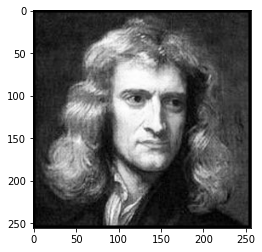

In [2]:


from itertools import zip_longest

import numpy

import matplotlib.pyplot as plt
from skimage import img_as_bool, img_as_ubyte
from skimage.io import imread
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['newton.jpg']))
import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()




In [4]:


def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

def xor(string1, string2):
    output = []
    for bit1, bit2 in zip(string1, string2):
        output.append((int(bit1) + int(bit2)) % 2)
    return ''.join([str(bit) for bit in output])

def ECB(data, key):
    """Implements ECB mode of operation.
    
    Args:
        data: numpy array of binary digits
        key: string of length 64
    
    Returns:
        encrypted data: numpy array of binary digits
    """
    outputs = []
    cipher = DES()
    data = ''.join(map(lambda x: str(int(x)), data))
    for block in grouper(data, 64):
        output = cipher.encrypt(key, ''.join(block))
        outputs.append(output)
    return numpy.array(outputs).flatten()

def CBC(data, key, iv):
    """Implements CBC mode of operation.
    
    Args:
        data: numpy array of binary digits
        key: string of length 64
        iv: string of length 64
    
    Returns:
        encrypted data: numpy array of binary digits
    """
    outputs = []
    cipher = DES()
    output = iv
    data = ''.join(map(lambda x: str(int(x)), data))
    for block in grouper(data, 64):
        output = cipher.encrypt(key, xor(output, block))
        outputs.append(output)
        output = ''.join([str(bit) for bit in output])
    return numpy.array(outputs).flatten()



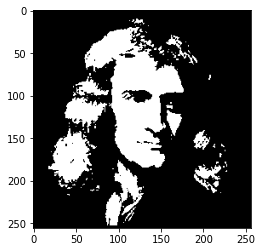

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 1 fits in uint8
  return convert(image, np.uint8, force_copy)


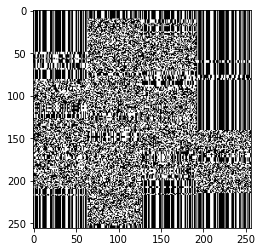

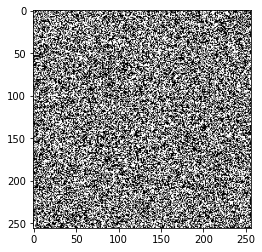

In [5]:
img = imread('newton.jpg', as_gray=True)
img = img_as_bool(img)
plt.imshow(img_as_ubyte(img), cmap='gray')
plt.show()
output1 = ECB(img.flatten(), key='0110110101101111011011100110000101110010011000110110100001111001')

plt.imshow(img_as_ubyte(output1.reshape(256, 256)), cmap='gray')
plt.show()

output2 = CBC(img.flatten(), key='0110110101101111011011100110000101110010011000110110100001111001',
                iv='0110010101101111111001100110000101111010011000110110100001111001')

plt.imshow(img_as_ubyte(output2.reshape(256, 256)), cmap='gray')
plt.show()

In [6]:
def ECBD(data, key):
    """Implements ECB mode of operation.
    
    Args:
        data: numpy array of binary digits
        key: string of length 64
    
    Returns:
        encrypted data: numpy array of binary digits
    """
    outputs = []
    cipher = DES()
    data = ''.join(map(lambda x: str(int(x)), data))
    for block in grouper(data, 64):
        output = cipher.decrypt(key, ''.join(block))
        outputs.append(output)
    return numpy.array(outputs).flatten()

def CBCD(data, key, iv):
    """Implements CBC mode of operation.
    
    Args:
        data: numpy array of binary digits
        key: string of length 64
        iv: string of length 64
    
    Returns:
        encrypted data: numpy array of binary digits
    """
    outputs = []
    cipher = DES()
    output = iv
    data = ''.join(map(lambda x: str(int(x)), data))
    for block in grouper(data, 64):
        output = cipher.decrypt(key, xor(output, block))
        outputs.append(output)
        output = ''.join([str(bit) for bit in output])
    return numpy.array(outputs).flatten()

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 1 fits in uint8
  return convert(image, np.uint8, force_copy)


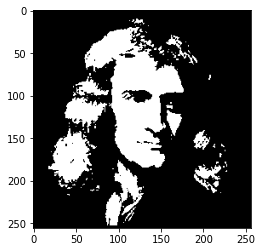

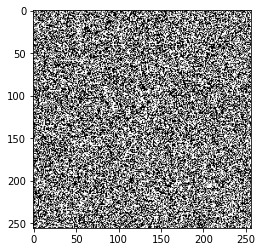

In [7]:
output3 = ECBD(output1.flatten(), key='0110110101101111011011100110000101110010011000110110100001111001')

plt.imshow(img_as_ubyte(output3.reshape(256, 256)), cmap='gray')
plt.show()

output4 = CBCD(output2.flatten(), key='0110110101101111011011100110000101110010011000110110100001111001',
                iv='0110010101101111111001100110000101111010011000110110100001111001')

plt.imshow(img_as_ubyte(output4.reshape(256, 256)), cmap='gray')
plt.show()